Importing Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


Read Data

In [3]:
ms = pd.read_csv(r"C:\Users\DELL\Desktop\Stock Market Analysis\MSFT.csv")
ms.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.061378,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.063570,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.064667,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.063022,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.061926,47894400


Getting to know data

In [4]:
ms.shape

(9008, 7)

In [5]:
ms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9008 entries, 0 to 9007
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       9008 non-null   object 
 1   Open       9008 non-null   float64
 2   High       9008 non-null   float64
 3   Low        9008 non-null   float64
 4   Close      9008 non-null   float64
 5   Adj Close  9008 non-null   float64
 6   Volume     9008 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 492.8+ KB


Showing Basics Statistics

Now that you’ve seen what data types are in your dataset, it’s time to get an overview of the values each column contains. To do this with .describe():

In [6]:
ms.describe()

,Open,High,Low,Close,Adj Close,Volume
count,9008.000000,9008.000000,9008.000000,9008.000000,9008.000000,9.008000e+03
mean,39.100634,39.509320,38.688871,39.113846,34.052517,5.893725e+07
std,54.693955,55.194788,54.185887,54.725668,54.945451,3.853809e+07
min,0.088542,0.092014,0.088542,0.090278,0.056994,2.304000e+06
25%,3.958985,4.007813,3.935547,3.960938,2.500626,3.481388e+07
50%,26.750000,27.030001,26.469999,26.745000,18.841834,5.222880e+07
75%,39.113751,39.783438,38.502499,39.115313,28.682776,7.281968e+07
max,344.619995,349.670013,342.200012,343.109985,343.109985,1.031789e+09


In [7]:
current_decade =ms[ms["Low"] > 0.091146]
current_decade

,Date,Open,High,Low,Close,Adj Close,Volume
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.063570,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.064667,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.063022,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.061926,47894400
5,1986-03-20,0.098090,0.098090,0.094618,0.095486,0.060282,58435200
...,...,...,...,...,...,...,...
9003,2021-11-30,335.320007,337.779999,328.989990,330.589996,330.589996,42885600
9004,2021-12-01,335.130005,339.279999,329.390015,330.079987,330.079987,33337600
9005,2021-12-02,330.299988,333.489990,327.799988,329.489990,329.489990,30766000
9006,2021-12-03,331.989990,332.700012,318.029999,323.010010,323.010010,41755900


In [8]:
current_decade =ms[ms["High"] > 0.098090]
current_decade

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.061378,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.063570,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.064667,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.063022,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.061926,47894400
...,...,...,...,...,...,...,...
9003,2021-11-30,335.320007,337.779999,328.989990,330.589996,330.589996,42885600
9004,2021-12-01,335.130005,339.279999,329.390015,330.079987,330.079987,33337600
9005,2021-12-02,330.299988,333.489990,327.799988,329.489990,329.489990,30766000
9006,2021-12-03,331.989990,332.700012,318.029999,323.010010,323.010010,41755900


In [9]:
print('Max is:',ms.max())
print('Sum is:',ms.sum())
print('Mean is:',ms.mean())

Max is: Date         2021-12-06
Open         344.619995
High         349.670013
Low          342.200012
Close        343.109985
Adj Close    343.109985
Volume       1031788800
dtype: object
Sum is: Date         1986-03-131986-03-141986-03-171986-03-181986-0...
Open                                             352218.514643
High                                             355899.955663
Low                                              348509.350384
Close                                            352337.525314
Adj Close                                        306745.074327
Volume                                            530906710500
dtype: object
Mean is: Open         3.910063e+01
High         3.950932e+01
Low          3.868887e+01
Close        3.911385e+01
Adj Close    3.405252e+01
Volume       5.893725e+07
dtype: float64


C:\Users\DELL\AppData\Local\Temp/ipykernel_4676/349332393.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print('Mean is:',ms.mean())


<AxesSubplot:>

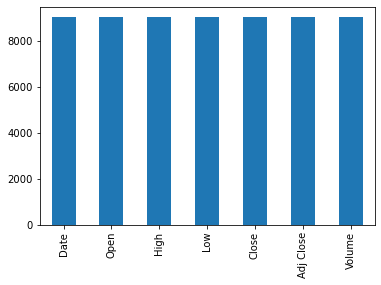

In [13]:
#Check the nulls values on MSFT Dataset

ms.isnull().count().plot.bar()

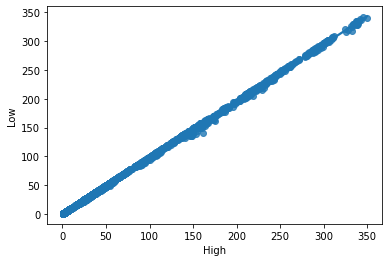

In [14]:
#plot the regression line using Low and High Attributes

ax=sns.regplot(x='High',y='Low',data=ms)

In [16]:
#Plot High and Low Attributes using bar plot

27.500000     17
0.364583      15
26.000000     15
0.381944      15
0.369792      15
              ..
34.009998      1
34.014999      1
34.535000      1
34.355000      1
327.450012     1
Name: High, Length: 5090, dtype: int64


<AxesSubplot:>

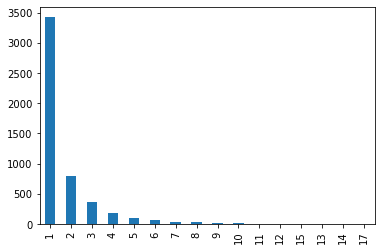

In [17]:
price = ms['High'].value_counts()
print(price)
price.value_counts().plot.bar()

25.500000     18
0.378472      17
27.000000     17
2.656250      17
0.359375      16
              ..
32.994999      1
32.244999      1
32.375000      1
32.224998      1
319.230011     1
Name: Low, Length: 5108, dtype: int64


<AxesSubplot:>

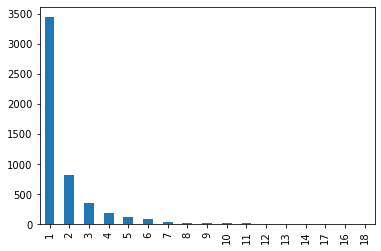

In [18]:
price1 = ms['Low'].value_counts()
print(price1)
price1.value_counts().plot.bar()

In [21]:
# Plot high and low vaiable to read easily manner using "Plotly library"

import plotly.express as px
#!pip install plotly==5.13.1

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='High', ylabel='Density'>

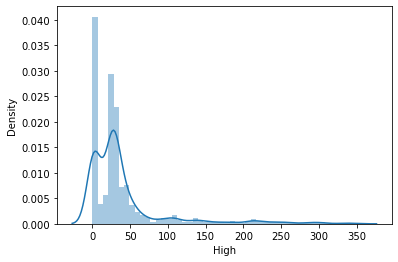

In [23]:
#Distributiong of Age variable
sns.distplot(ms['High'])

<AxesSubplot:xlabel='High', ylabel='Count'>

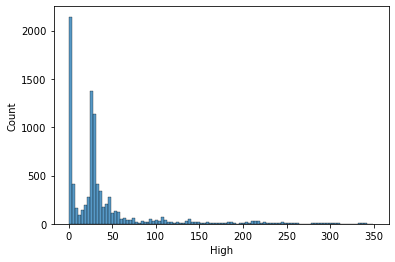

In [24]:
#Distributiong of Age variable
sns.histplot(ms['High'])

18316800    4
37843200    3
84297600    3
47894400    3
12672000    3
           ..
41405200    1
47878400    1
63521600    1
65263600    1
30007300    1
Name: Volume, Length: 8826, dtype: int64


<AxesSubplot:>

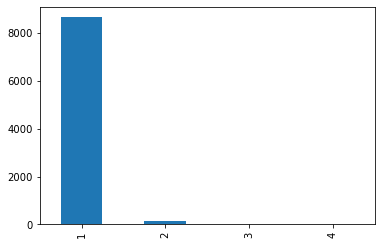

In [25]:
#Plot and compare "Volume" attribute with "High"

price = ms['Volume'].value_counts()
print(price)

price.value_counts().plot.bar()

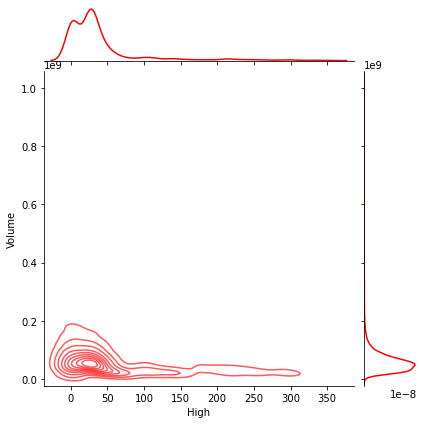

In [26]:
# Join the both Volume and High for easily compare
sns.jointplot(x = 'High', y = 'Volume',
              data = ms, kind = 'kde', color = "red", alpha = 0.65)

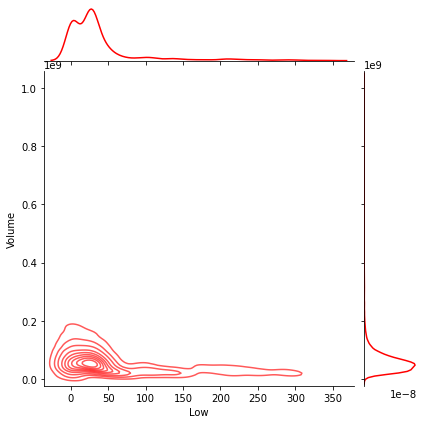

In [27]:
sns.jointplot(x = 'Low', y = 'Volume',
              data = ms, kind = 'kde', color = "red", alpha = 0.65)

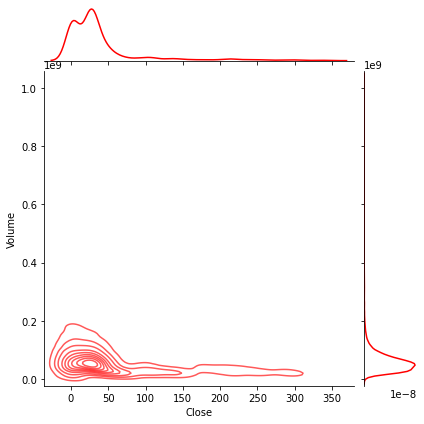

In [28]:
sns.jointplot(x = 'Close', y = 'Volume',
              data = ms, kind = 'kde', color = "red", alpha = 0.65)

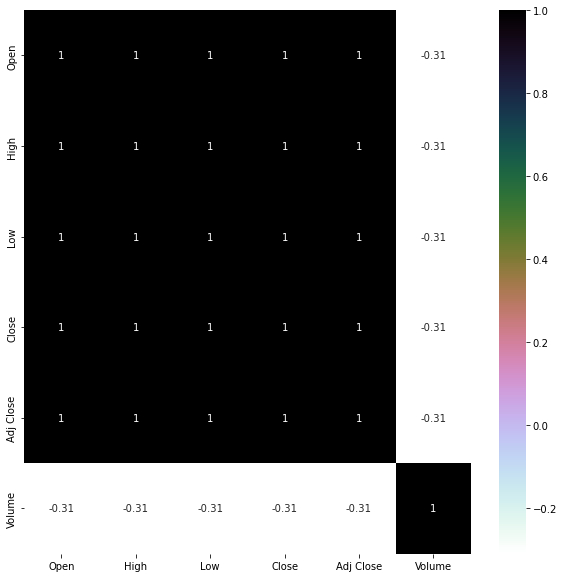

In [29]:
#draws  heatmap with input as the correlation matrix.

plt.figure(figsize=(10,10)) 
sns.heatmap(ms.corr(),annot=True,cmap='cubehelix_r') 
plt.show()

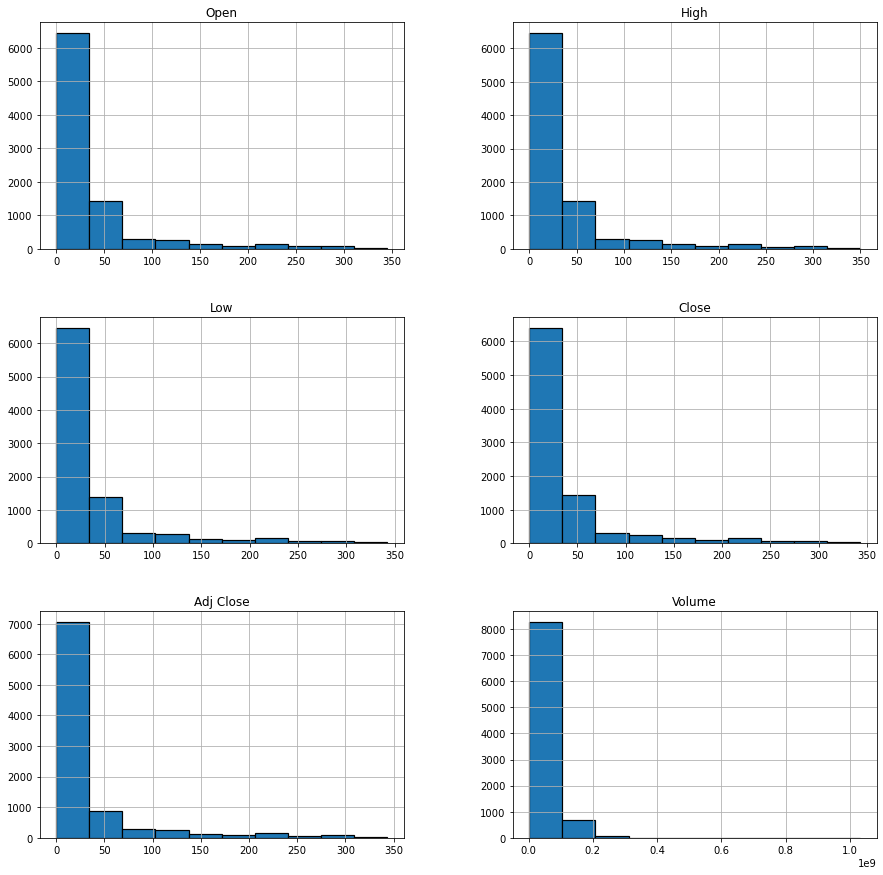

In [30]:
ms.hist(edgecolor='black', linewidth=1.2)
fig=plt.gcf()
fig.set_size_inches(15,15)
plt.show()

<AxesSubplot:xlabel='High', ylabel='Volume'>

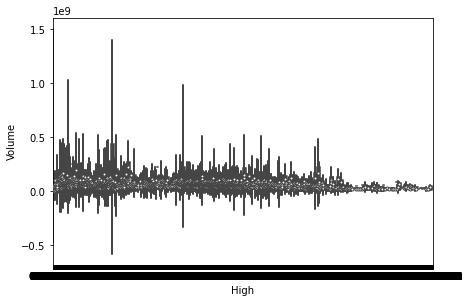

In [31]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='High',y='Volume',data=ms)

Making prediction using Machine Learnig Algorithms

In [33]:
# Drop the "date" attribute a
ms.drop(['Date'], axis= 1, inplace=True)

Split dataset Into Train and Test Data

In [36]:
X = ms.iloc[:, : -1]
y = ms.iloc[:, -1]

Feature Scaling

In [37]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [39]:
#Fit the model
X = sc.fit_transform(X)
X

array([[-0.71331937, -0.71401569, -0.71240823, -0.71298882, -0.61866861],
       [-0.71316066, -0.71399996, -0.71224803, -0.71292538, -0.61862871],
       [-0.71309718, -0.71398423, -0.71218395, -0.71289364, -0.61860875],
       ...,
       [ 5.32445526,  5.32653531,  5.33583893,  5.30632648,  5.37722168],
       [ 5.35535622,  5.31222197,  5.15552387,  5.18791149,  5.25928035],
       [ 5.20834868,  5.21709901,  5.17767131,  5.24602258,  5.317159  ]])

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [44]:
from sklearn.pipeline import make_pipeline
from sklearn.datasets import make_classification

In [45]:
# apply scaling on training data

X, y = make_classification(random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
pipe = make_pipeline(StandardScaler(), LogisticRegression())
pipe.fit(X_train, y_train) 

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

Fitting Logistic Regression on trainig set

In [46]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
pred_lr = lr.predict(X_test)
print(list(pred_lr))

[0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0]


In [48]:
from sklearn.metrics import classification_report

print(classification_report( y_test, pred_lr))

print("\n")

print(confusion_matrix(y_test, pred_lr))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        10

    accuracy                           1.00        25
   macro avg       1.00      1.00      1.00        25
weighted avg       1.00      1.00      1.00        25



[[15  0]
 [ 0 10]]


In [50]:
LR = LogisticRegression(random_state=0)
LR.fit(X_train, y_train)

LogisticRegression(random_state=0)

Predicting Test set 

In [51]:
# Predicting the Test set results
y_pred = LR.predict(X_test)
print(list(y_pred ))

[0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0]


Probability Of All Values

In [52]:
#probability of all values
proba = LR.predict_proba(X_test)[0:10,:]
proba

array([[8.43664348e-01, 1.56335652e-01],
       [1.19065922e-03, 9.98809341e-01],
       [2.13781577e-02, 9.78621842e-01],
       [3.38249203e-02, 9.66175080e-01],
       [9.99946888e-01, 5.31121030e-05],
       [2.36352523e-02, 9.76364748e-01],
       [9.77335071e-01, 2.26649288e-02],
       [3.62880927e-01, 6.37119073e-01],
       [7.08963650e-02, 9.29103635e-01],
       [5.00186393e-01, 4.99813607e-01]])

Confusion Matrix

In [53]:
cm = confusion_matrix(y_test , y_pred)
print(cm)

[[15  0]
 [ 0 10]]


<AxesSubplot:>

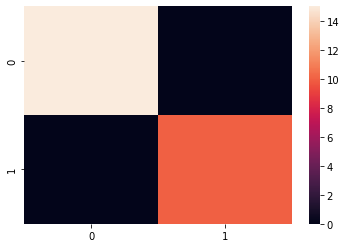

In [54]:
#Plot the Heatmap

sns.heatmap(cm)

There are no errors found. 

Accuracy Test

In [55]:
from sklearn.metrics import accuracy_score

ac = accuracy_score(y_test , pred_lr)*100
print("The Accuracy is ", ac)

The Accuracy is  100.0
